# Bitcoin Price Prediction - Documentation
## BS Data Science Project - Recurrent Bitcoin Network

This notebook contains a brief documentation on retrieving data from [Messari](https://messari.io/) through its [API](https://messari.io/api/docs). Method of data collection would be through a REST API with a `json` response.

### Data

The expected data would be a data frame of time series data denoted by its columns and it would be splitted, normalized, and be fed for model training and testing. In this project, we would only use daily time series data from 2016 to 2020 as the training and validation set, while 2021 would be used as a test set. Note that this notebook does not include the retrieval of the test set.

### Prerequesites

Before running this notebook, several python packages are needed to be installed as shown in the following cell. In addition, changing of working directory within the local repository was done.

In [1]:
%%capture
# Redirects the current working directory to the source directory
%cd ../src

In [2]:
# Built-in packages
import os
import time
from datetime import datetime

# Packages to be installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from tqdm import tqdm

# Local python functions
import collect

In [3]:
# Notebook Execution Time
print('Current time: {}'.format(datetime.now()))

Current time: 2022-02-10 18:34:36.071612


In [4]:
# Remove the comment if you intend to apply your Messari API key
# os.environ['MESSARI_API_KEY'] = <insert_key_here>

In [5]:
# Check if the API key is set
'MESSARI_API_KEY' in os.environ

True

In [6]:
api_header = {'x-messari-api-key':os.getenv('MESSARI_API_KEY')}
collector = collect.MessariCollector(headers=api_header)

In [7]:
# Check if collector read the API key
collector.headers['x-messari-api-key'] is not None

True

### Retrieve Metrics Data From Messari

This section retrieves the complete list of the possible metrics to be queried in time series.

To speed up the data collection process, it is recommended to apply an API key from Messari for an extended number of requests per minute. Although, it is not required as it can still be requested in low request rates. This can be achieved through inserting your API key to the environment.

To get Messari's API keys, a Messari account is required.

In [8]:
metrics = collector.get_metrics()
freemetrics = metrics.get_free_metrics(return_df=True)
freemetrics.head(10)

,name,description,values_schema,minimum_interval,role_restriction,source_attribution
metric_id,,,,,,
act.addr.cnt,Active Addresses Count,The sum count of unique addresses that were ac...,{'active_addresses': 'The sum count of unique ...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
blk.cnt,Block Count,The sum count of blocks created each day,{'block_count': 'The sum count of blocks creat...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
blk.size.byte,Block Size (bytes),The sum of the size (in bytes) of all blocks c...,{'block_count': 'The sum of the size (in bytes...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
blk.size.bytes.avg,Average Block Size (bytes),The mean size (in bytes) of all blocks created,{'block_count': 'The mean size (in bytes) of a...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
cg.sply.circ,Circulating Supply (CoinGecko),The circulating supply acknowledges that token...,{'circulating_supply': 'The circulating supply...,1d,NaN,[]
daily.shp,Sharpe Ratio,The Sharpe ratio (performance of the asset com...,{'sharpe_30d': 'The asset's Sharpe ratio calcu...,1d,NaN,"[{'name': 'Kaiko', 'url': 'https://www.kaiko.c..."
daily.vol,Volatility,The annualized standard-deviation of daily ret...,{'volatility_30d': 'The asset's volatility cal...,1d,NaN,"[{'name': 'Kaiko', 'url': 'https://www.kaiko.c..."
diff.avg,Average Difficulty,The mean difficulty of finding a hash that mee...,{'mean_difficulty': 'The mean difficulty durin...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
exch.flow.in.ntv,Deposits on Exchanges (Native Units),The amount of the asset sent to exchanges that...,{'flow_in': 'The amount of the asset sent to e...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."


In [9]:
freemetrics.to_csv('../raw/freemetrics.csv')

### Retrieve Time Series Data

In this section, we would retrieve time series data with the given metrics retrieved above. A script was implemented to automate the data collection process.

In [10]:
from scripts import get_train_data
from scripts import get_test_data

In [11]:
train_list = get_train_data()
test_list = get_test_data()

train = pd.concat(train_list, ignore_index=True)
test = pd.concat(test_list, ignore_index=True)

Response [200]:   7%|▋         | 4/59 [00:07<01:02,  1.13s/it]

Response [500]: Internal Server Error


Response [200]:  44%|████▍     | 26/59 [00:24<00:40,  1.23s/it]

Response [429]: Rate limit exceeded, retry in 33 seconds. To increase the limit, sign up for Pro on messari.io.


Response [200]:  61%|██████    | 36/59 [01:07<00:27,  1.22s/it]

Response [501]: Not Implemented


Response [200]:  92%|█████████▏| 54/59 [01:18<00:02,  1.82it/s]

Response [429]: Rate limit exceeded, retry in 40 seconds. To increase the limit, sign up for Pro on messari.io.


Response [200]:  97%|█████████▋| 57/59 [02:02<00:04,  2.14s/it]


Response [200]:   7%|▋         | 4/59 [00:06<00:48,  1.13it/s]

Response [500]: Internal Server Error


Response [200]:  41%|████      | 24/59 [00:16<00:12,  2.74it/s]

Response [429]: Rate limit exceeded, retry in 40 seconds. To increase the limit, sign up for Pro on messari.io.


Response [200]:  61%|██████    | 36/59 [01:05<00:18,  1.24it/s]

Response [501]: Not Implemented


Response [200]:  88%|████████▊ | 52/59 [01:14<00:03,  1.88it/s]

Response [429]: Rate limit exceeded, retry in 42 seconds. To increase the limit, sign up for Pro on messari.io.


Response [200]:  97%|█████████▋| 57/59 [02:07<00:04,  2.23s/it]


In [12]:
train.head()

,timestamp,metric,submetric,value
0,2016-01-01,act.addr.cnt,active_addresses,316781.0
1,2016-01-02,act.addr.cnt,active_addresses,417966.0
2,2016-01-03,act.addr.cnt,active_addresses,398443.0
3,2016-01-04,act.addr.cnt,active_addresses,413159.0
4,2016-01-05,act.addr.cnt,active_addresses,435291.0


In [13]:
test.head()

,timestamp,metric,submetric,value
0,2021-01-01,act.addr.cnt,active_addresses,1001890.0
1,2021-01-02,act.addr.cnt,active_addresses,1140633.0
2,2021-01-03,act.addr.cnt,active_addresses,1184688.0
3,2021-01-04,act.addr.cnt,active_addresses,1270082.0
4,2021-01-05,act.addr.cnt,active_addresses,1230529.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111925 entries, 0 to 111924
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  111925 non-null  datetime64[ns]
 1   metric     111925 non-null  object        
 2   submetric  111925 non-null  object        
 3   value      111925 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.4+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  11403 non-null  datetime64[ns]
 1   metric     11403 non-null  object        
 2   submetric  11403 non-null  object        
 3   value      11403 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 356.5+ KB


In [17]:
train.pivot_table(
    index='timestamp',
    columns=['metric','submetric'],
    values='value'
).isna().sum().sort_values(ascending=False)[:10]

metric               submetric          
reddit.active.users  active_users           1588
reddit.subscribers   subscribers            1588
act.addr.cnt         active_addresses          0
sply.total.iss       issuance_total_usd        0
new.iss.usd          issuance_usd              0
nvt.adj              nvt_adjusted              0
nvt.adj.90d.ma       nvt_adjusted_90d_ma       0
price                close                     0
                     high                      0
                     low                       0
dtype: int64

### Feature Selection

The two metrics have incomplete data specifically on the earlier timestamps. For consistency, we would drop such metrics.

In [18]:
filter_users_train = train['metric'] != 'reddit.active.users'
filter_subs_train = train['metric'] != 'reddit.subscribers'
train = train[filter_users_train & filter_subs_train]

In [19]:
filter_users_test = test['metric'] != 'reddit.active.users'
filter_subs_test = test['metric'] != 'reddit.subscribers'
test = test[filter_users_test & filter_subs_test]

In [20]:
wide_train = train.pivot_table(
    index='timestamp',
    columns=['metric', 'submetric'],
    values='value'
)

prices = wide_train.pop('price')

In [21]:
wide_train

metric         act.addr.cnt     blk.cnt blk.size.byte blk.size.bytes.avg  \
submetric  active_addresses block_count   block_count        block_count   
timestamp                                                                  
2016-01-01         316781.0       135.0    66544854.0       4.929248e+05   
2016-01-02         417966.0       145.0    83567789.0       5.763296e+05   
2016-01-03         398443.0       145.0    82041255.0       5.658018e+05   
2016-01-04         413159.0       181.0    99672880.0       5.506789e+05   
2016-01-05         435291.0       157.0   100644706.0       6.410491e+05   
...                     ...         ...           ...                ...   
2020-12-27        1049825.0       148.0   193716651.0       1.308896e+06   
2020-12-28        1154354.0       160.0   206766595.0       1.292291e+06   
2020-12-29        1146131.0       152.0   194179955.0       1.277500e+06   
2020-12-30        1221579.0       172.0   215838093.0       1.254873e+06   
2020-12-31        1193822.0       166.0   213533786.0       1.286348e+06   

metric      daily.shp                                       daily.vol  \
submetric  sharpe_1yr sharpe_30d sharpe_3yr sharpe_90d volatility_1yr   
timestamp                                                               
2016-01-01   0.869196   3.254284   1.604864   3.685772       0.685757   
2016-01-02   0.903431   3.742549   1.609291   3.635713       0.685251   
2016-01-03   0.885630   3.463730   1.612791   3.592289       0.685339   
2016-01-04   1.075561   3.520499   1.612907   3.596404       0.675956   
2016-01-05   1.157387   2.312140   1.609834   3.442895       0.673562   
...               ...        ...        ...        ...            ...   
2020-12-27   1.983447   8.207496   0.326527   6.766483       0.752805   
2020-12-28   1.994093   7.835167   0.332238   6.742289       0.753484   
2020-12-29   1.987428   6.938161   0.380683   6.615674       0.753403   
2020-12-30   2.077002   7.061308   0.362164   7.173090       0.753598   
2020-12-31   2.081395   8.284225   0.381229   7.203934       0.755037   

metric                     ...        txn.fee.med.ntv    txn.tfr.avg.ntv  \
submetric  volatility_30d  ... transaction_fee_median transfer_value_avg   
timestamp                  ...                                             
2016-01-01       0.640308  ...               0.000100           2.716966   
2016-01-02       0.631588  ...               0.000100           1.765765   
2016-01-03       0.633846  ...               0.000100           1.845884   
2016-01-04       0.633926  ...               0.000100           2.201920   
2016-01-05       0.592641  ...               0.000100           2.872012   
...                   ...  ...                    ...                ...   
2020-12-27       0.686434  ...               0.000158           0.657102   
2020-12-28       0.690959  ...               0.000164           0.809730   
2020-12-29       0.697172  ...               0.000164           0.765763   
2020-12-30       0.647848  ...               0.000171           0.757514   
2020-12-31       0.636090  ...               0.000171           0.646718   

metric             txn.tfr.val.adj.ntv           txn.tfr.val.med  \
submetric  transaction_volume_adjusted transfer_value_median_usd   
timestamp                                                          
2016-01-01               174515.818449                  5.086063   
2016-01-02               189629.972730                  2.997635   
2016-01-03               232482.193500                  2.204723   
2016-01-04               258630.297507                  7.544331   
2016-01-05               335747.819336                  8.489105   
...                                ...                       ...   
2020-12-27               241838.497017                137.846432   
2020-12-28               397621.711422                149.061442   
2020-12-29               339224.096073                153.351433   
2020-12-30               335274

In [22]:
wide_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2016-01-01 to 2020-12-31
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   (act.addr.cnt, active_addresses)                    1827 non-null   float64
 1   (blk.cnt, block_count)                              1827 non-null   float64
 2   (blk.size.byte, block_count)                        1827 non-null   float64
 3   (blk.size.bytes.avg, block_count)                   1827 non-null   float64
 4   (daily.shp, sharpe_1yr)                             1827 non-null   float64
 5   (daily.shp, sharpe_30d)                             1827 non-null   float64
 6   (daily.shp, sharpe_3yr)                             1827 non-null   float64
 7   (daily.shp, sharpe_90d)                             1827 non-null   float64
 8   (daily.vol, volatility_1yr)                         1827 non

In [23]:
prices

submetric,close,high,low,open,volume
timestamp,,,,,
2016-01-01,433.960345,437.841344,426.068766,430.206620,2.099646e+07
2016-01-02,433.221343,436.820867,431.542401,434.015456,1.393225e+07
2016-01-03,429.132867,433.727409,422.757469,433.212063,2.396948e+07
2016-01-04,433.152291,435.231337,428.233668,429.401480,2.528594e+07
2016-01-05,432.001391,434.548442,428.386082,432.978697,1.956450e+07
...,...,...,...,...,...
2020-12-27,26250.457794,28375.198389,25748.450880,26453.928239,1.043023e+10
2020-12-28,27032.289152,27469.396137,26069.019129,26248.564564,5.653047e+09
2020-12-29,27360.005185,27387.310760,25832.269524,27036.832984,5.558736e+09


Text(0.5, 0.885, 'Time Series of Blockchain-derived Data')

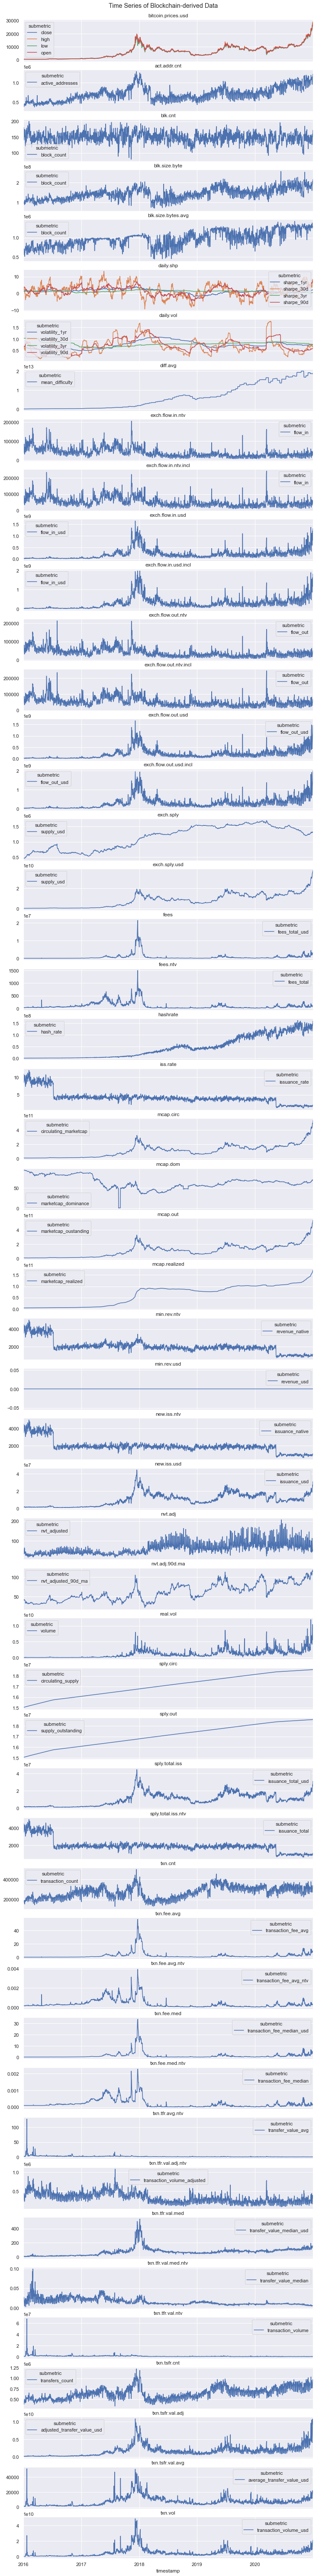

In [24]:
fig, ax = plt.subplots(nrows=51, ncols=1, sharex=True)

prices.drop('volume', axis=1).plot(ax=ax[0], title='bitcoin.prices.usd')

list_metrics = train['metric'].unique().tolist()
list_metrics.remove('price')
for metric, num in zip(list_metrics, np.arange(1, 51)):
    wide_train[metric].plot(ax=ax[num], figsize=(12,108), title=metric)

fig.suptitle('Time Series of Blockchain-derived Data', y=0.885)
# fig.savefig('TimeseriesPlot.png', dpi=300, bbox_inches='tight')

In [25]:
train.to_csv('../raw/train.csv', index=False)
test.to_csv('../raw/test.csv', index=False)